In [2]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display settings
# pd.set_option('display.max_columns', None)
# sns.set(style="whitegrid")


In [3]:
## Load Dataset

df = pd.read_csv(r'C:\Users\drhum\OneDrive\Desktop\Fall 2025\CMSE 830 Foundation for Data Science\Project\cmse830_fds\data\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
## Inspect Data

df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


np.int64(723)

In [5]:
## Clean Data

# Drop duplicates
df = df.drop_duplicates()

# Basic imputation (if needed)
df.fillna(df.mean(numeric_only=True), inplace=True)


In [6]:
## Encode categorical variables

from sklearn.preprocessing import LabelEncoder

# Example: encode 'sex' and 'cp' if needed
if df['sex'].dtype == 'object':
    df['sex'] = LabelEncoder().fit_transform(df['sex'])

if df['cp'].dtype == 'object':
    df['cp'] = LabelEncoder().fit_transform(df['cp'])


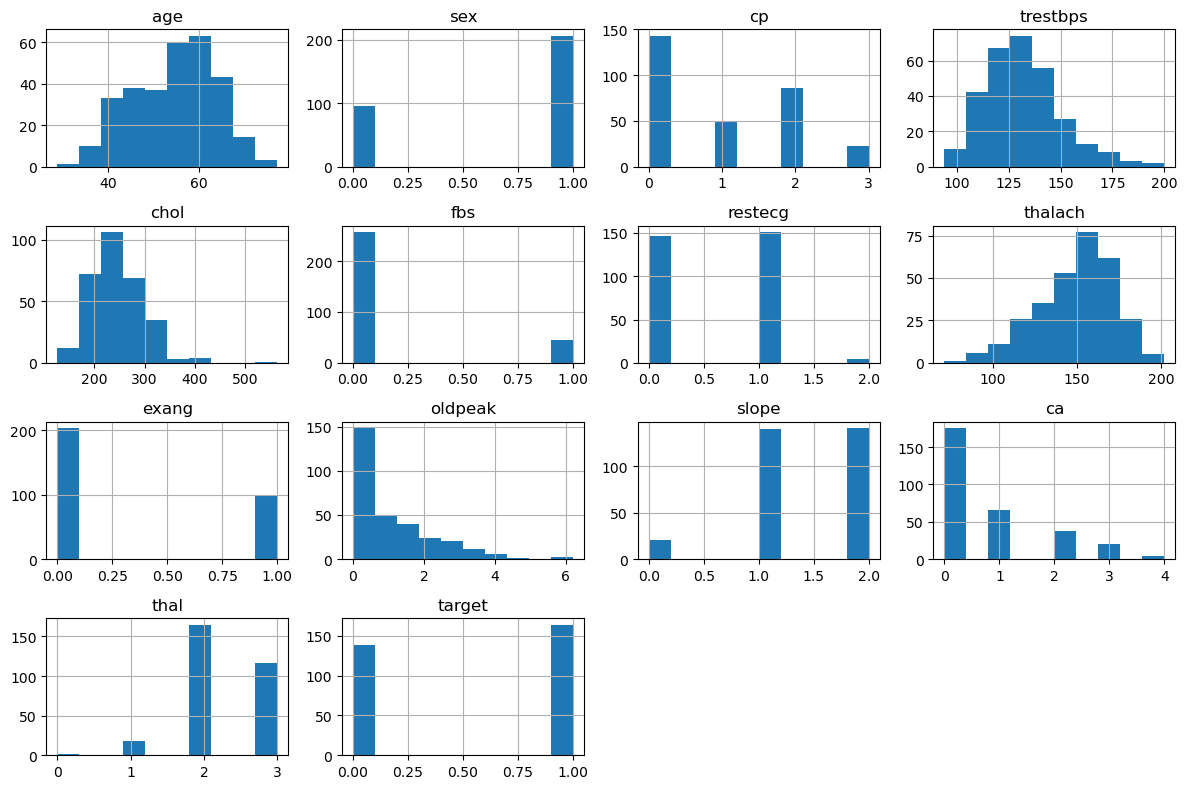

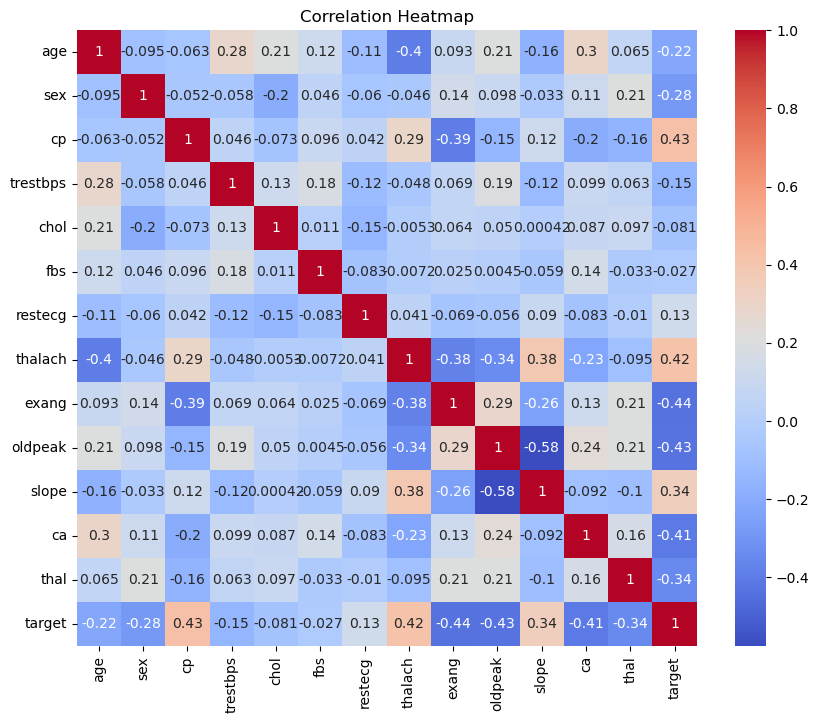

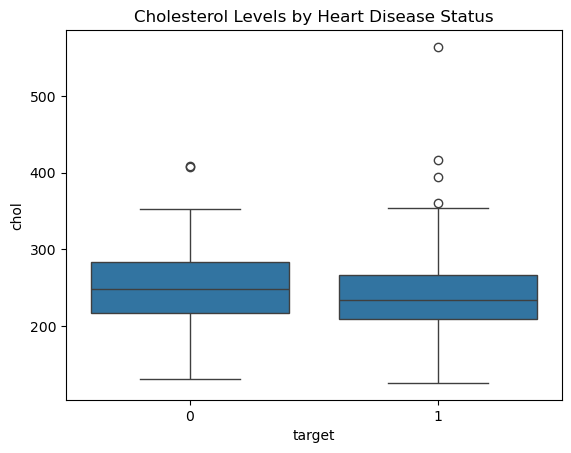

In [7]:
## Visualize Data

# Histogram
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot: cholesterol by target
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol Levels by Heart Disease Status")
plt.show()


In [9]:
## Save cleaned dataset
df.to_csv(r'C:\Users\drhum\OneDrive\Desktop\Fall 2025\CMSE 830 Foundation for Data Science\Project\cmse830_fds\data\heart_cleaned.csv', index=False)